<a href="https://colab.research.google.com/github/nguyetlt1012/house-price/blob/main/House's_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data load


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20,10)

In [3]:
df1 = pd.read_csv('https://drive.google.com/uc?export=download&id=13mP8FeMX09L3utbPcCDp-U2fXnf53gwx')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# Data pre-processing


In [5]:
#Viewing unique area type
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
#Viewing the number of unique area_types
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [7]:
# df2 = df1.drop(['area_type' , 'society' , 'balcony' , 'availability'] , axis = 'columns')
df2 = df1.drop(['area_type','society' , 'balcony' , 'availability'] , axis = 'columns')

df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

## Size processing



In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
#Creating a new column bhk
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-11-ed76a5095482>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [12]:
df3[['bath', 'bhk']]

,bath,bhk
0,2.0,2
1,5.0,4
2,2.0,3
3,3.0,3
4,2.0,2
...,...,...
13315,4.0,5
13316,5.0,4
13317,2.0,2
13318,4.0,4


## Total_sqft processing

In [13]:
#Viewing unique values in total_sqft column
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# Defining is_float function
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 30 to 13299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    190 non-null    object 
 1   size        190 non-null    object 
 2   total_sqft  190 non-null    object 
 3   bath        190 non-null    float64
 4   price       190 non-null    float64
 5   bhk         190 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 10.4+ KB


The values that have range will be replaced with their average and the values that have units will be droped.


In [16]:
#Defining a function to convert the range values
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [17]:
#Checking convert_sqft_to_num function
convert_sqft_to_num('3067 - 8156')

5611.5

In [18]:
#Applying convert_sqft_to_num
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]

we will assume that 1 bhk = 300 sqft. If some values do not satisfy this condition we will remove those rows from our dataset.

In [19]:
df4 = df4[~(df4.total_sqft/df4.bhk < 300)]
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12456 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12456 non-null  object 
 1   size        12456 non-null  object 
 2   total_sqft  12456 non-null  float64
 3   bath        12456 non-null  float64
 4   price       12456 non-null  float64
 5   bhk         12456 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 681.2+ KB


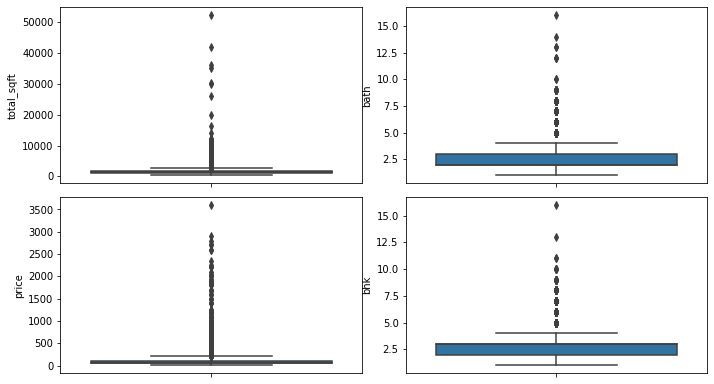

In [20]:
## displaying only the continous variables from the dataset
## to determine the variables which have outliers and those which needs to be removed
## dividing the dataset into Continous and Categorical variables:
cont_ = df4.select_dtypes(exclude = 'object')
fig = plt.figure(figsize = (10,8))
for index,col in enumerate(cont_):
    plt.subplot(3,2,index+1)
    sns.boxplot(y = cont_.loc[:,col])
fig.tight_layout(pad = 1.0)

In [21]:
df4 = df4.drop(df4[df4['bath']>6].index)
df4 = df4.drop(df4[df4['bhk']>7.0].index)

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12346 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12346 non-null  object 
 1   size        12346 non-null  object 
 2   total_sqft  12346 non-null  float64
 3   bath        12346 non-null  float64
 4   price       12346 non-null  float64
 5   bhk         12346 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 675.2+ KB


## Price per square feet processing

In [23]:
#Creating Price Per square Feet Column
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


## Location processing

In [24]:
#Viewing the number of location datapoints 
df5['location'] = df5['location'].apply(lambda x : x.strip())
location_stats = df5['location'].value_counts(ascending = False)
location_stats

Whitefield                  532
Sarjapur  Road              386
Electronic City             295
Kanakpura Road              262
Thanisandra                 233
                           ... 
singapura paradise            1
Gattigere                     1
Uvce Layout                   1
Wajid layout thanisandra      1
Abshot Layout                 1
Name: location, Length: 1191, dtype: int64

In [25]:
#Locations having less than or equal to 10 data points
location_stats_less_than_10 = location_stats[location_stats<= 10]
location_stats_less_than_10

Dairy Circle                10
1st Block Koramangala       10
LB Shastri Nagar            10
Kalkere                     10
Chikkabanavar               10
                            ..
singapura paradise           1
Gattigere                    1
Uvce Layout                  1
Wajid layout thanisandra     1
Abshot Layout                1
Name: location, Length: 971, dtype: int64

In [26]:
#removing location data points less than or equal to 10
df5['location'] = df5['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5['location'].unique())

221

In [27]:
df5 = df5[df5.location !='other']

In [28]:
df5.shape

(9665, 7)

## Outlier removal

### price_per_sqft

In [29]:
df6 = df5.copy()

In [30]:
#Describing price_per_sqft
df6['price_per_sqft'].describe()

count     9665.000000
mean      5940.150688
std       3108.068528
min        371.428571
25%       4186.952288
50%       5238.000000
75%       6685.950413
max      56000.000000
Name: price_per_sqft, dtype: float64

In [31]:
#Function for removing extreme values
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key , subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        sd = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m-sd)) & (subdf.price_per_sqft <= (m+sd))]
        df_out = pd.concat([df_out , reduced_df] , ignore_index = True)
    return df_out

In [32]:
#Calling remove_pps_outliers 
df7 = remove_pps_outliers(df6)
df7.shape

(7767, 7)

### BHK's outliers

In [33]:
# Creating a Scatter plot function 
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location ) & (df.bhk == 2)]
    bhk3 = df[(df.location == location ) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft , bhk2.price , color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price , marker = '+' ,  color = 'green' , label = '3 BHK' , s = 50)
    plt.xlabel('Total Square feet Area')
    plt.ylabel('Price (Lakhs Indian Rupees)')
    plt.title('Location')
    plt.legend()

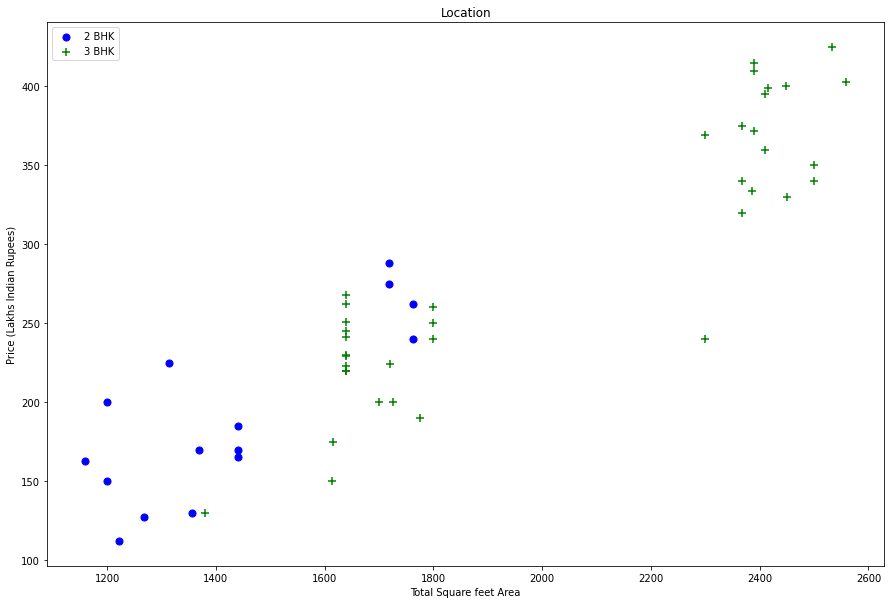

In [ ]:
#Calling plot_scatter_chart
plot_scatter_chart(df7 , 'Rajaji Nagar')

Some 2bhk houses around 1700 total square feet have weird prices that higher than the 3bhk ones

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

```
{
'1' : {
    'mean': 4000,
    'std: 2000,
    'count': 34
},
'2' : {
    'mean': 4300,
    'std: 2300,
    'count': 22
},    
}
```

In [34]:
# Creating remove_bhk_outliers
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices , axis = 'index')

In [35]:
#Calling remove_bhk_outliers
df8 = remove_bhk_outliers(df7)
df8.shape

(6003, 7)

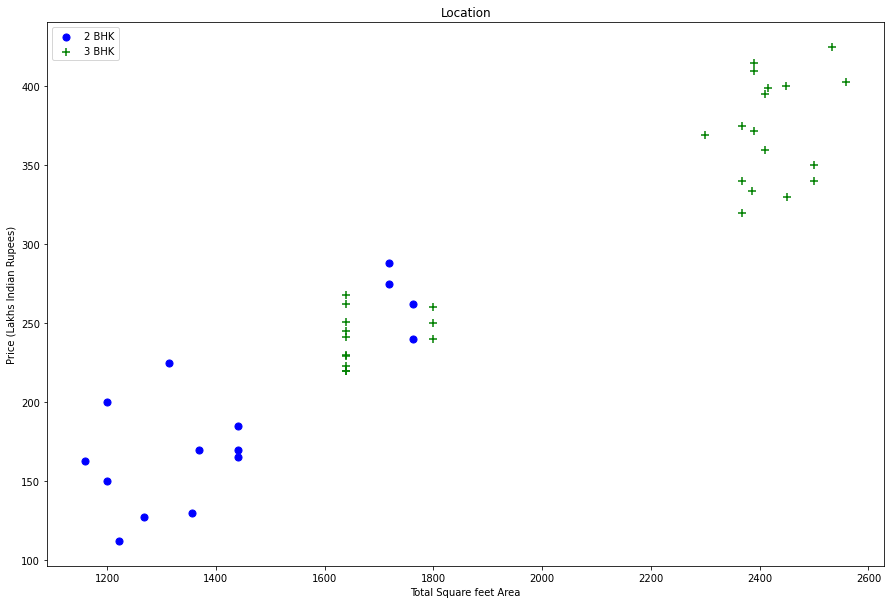

In [36]:
plot_scatter_chart(df8 , 'Rajaji Nagar')

### Bathroom

Text(0, 0.5, 'Count')

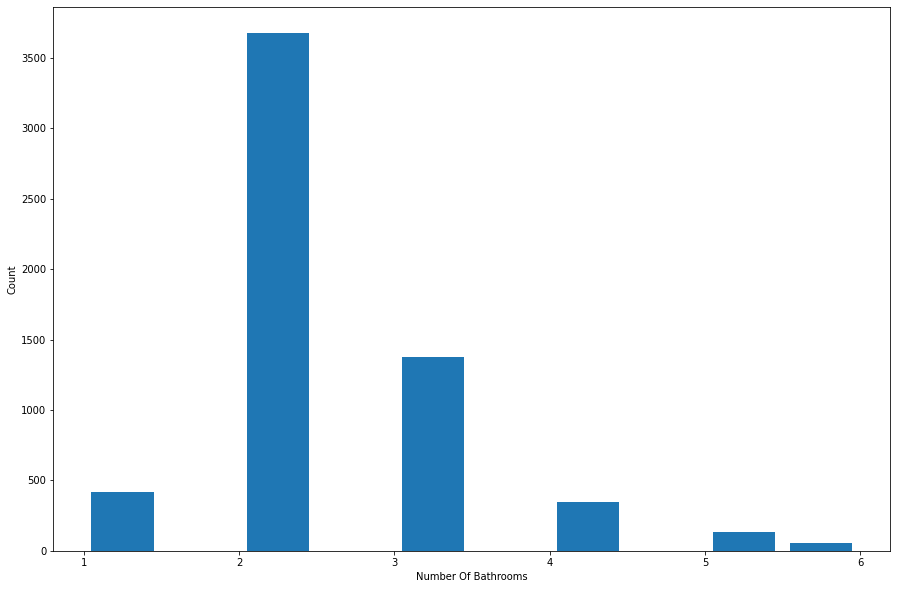

In [37]:
#Plotting a histogram showing bathrooms
plt.hist(df8['bath'] , rwidth = 0.8)
plt.xlabel('Number Of Bathrooms')
plt.ylabel('Count')

Most of the houses in our dataset has 2,4 or 5 bathrooms.

In [38]:
#Viewing unique bathroom values
df8['bath'].unique()

array([3., 5., 4., 2., 1., 6.])

Assume that a 1 bhk house can have atmost 3 bathrooms.

In [39]:
#Removing houses not satisfying our condition
df9 = df8[df8.bath< df8.bhk+2]
df9.shape

(5954, 7)

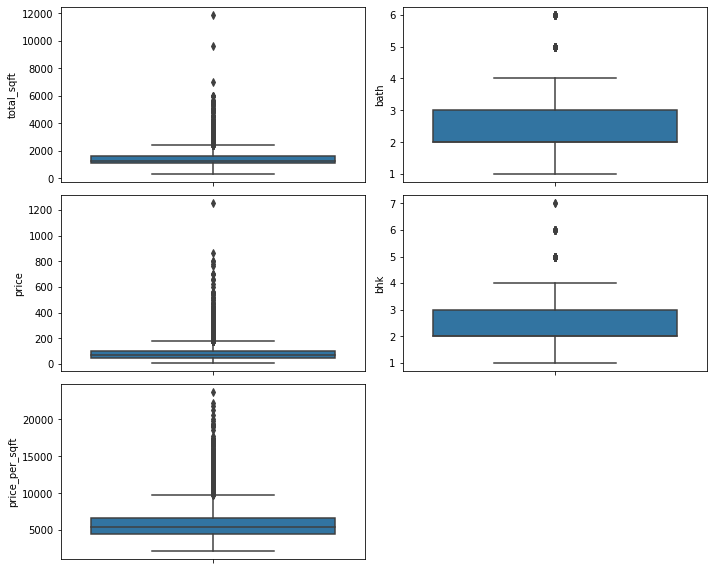

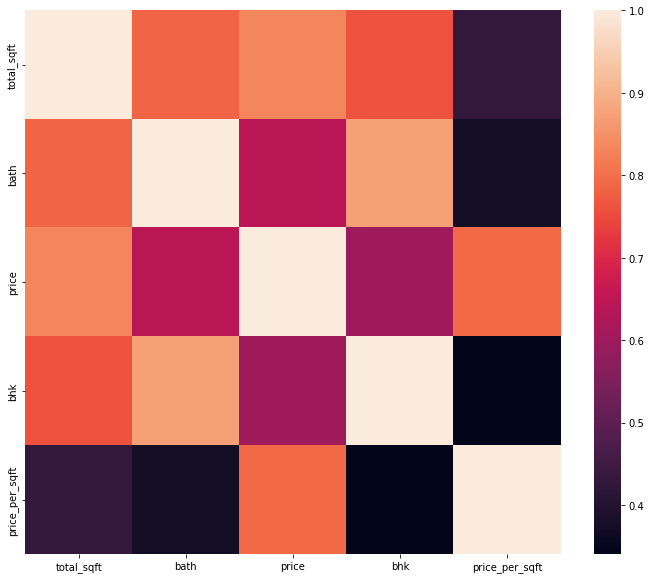

In [41]:
plt.figure(figsize=(12,10))
dataplot = sns.heatmap(df9.corr())

In [40]:
df9.corr().price.sort_values(ascending=False)

price             1.000000
total_sqft        0.832902
price_per_sqft    0.793193
bath              0.642367
bhk               0.602285
Name: price, dtype: float64

## Drop unused column

In our dataset we have a size column , but we have already bhk column. Also the price_per_sqft column was created to remove outliers. Now we have no use of size and price_per_sqft columns, therefore we will drop them.

In [42]:
#Dropping size and price_per_sqft
df10 = df9.drop(['size' , 'price_per_sqft'] , axis = 'columns')
df10.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


## Location

In [43]:
#One- hot encoding
dummies = pd.get_dummies(df10['location'])
dummies.head(3)

,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#Combining df10 and dummies
df11 = pd.concat([df10 , dummies] , axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1st Phase JP Nagar,1875.0,3.0,167.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Phase JP Nagar,1500.0,5.0,85.0,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2065.0,4.0,210.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Phase JP Nagar,2059.0,3.0,225.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Phase JP Nagar,1394.0,2.0,100.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#Dropping location column
df12 = df11.drop('location' , axis = 'columns')
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 1 to 7765
Columns: 224 entries, total_sqft to Yeshwanthpur
dtypes: float64(3), int64(1), uint8(220)
memory usage: 1.5 MB


In [70]:
path = './DataHousing.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df12.to_csv(f, index=False)

# Training model

## Train test split data

In [71]:
data = pd.read_csv('./DataHousing.csv')
data.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,5.0,85.0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,210.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2059.0,3.0,225.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5954 entries, 0 to 5953
Columns: 224 entries, total_sqft to Yeshwanthpur
dtypes: float64(3), int64(221)
memory usage: 10.2 MB


In [ ]:
# sns.pairplot(data)

In [49]:
#Dropping price column
X = data.drop('price' , axis = 'columns')
X.head()

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vasanthapura,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1500.0,5.0,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2065.0,4.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2059.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Making a new DataFrame for price
y = data.price
y.head()

0    167.0
1     85.0
2    210.0
3    225.0
4    100.0
Name: price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 10)

In [52]:
import pickle

In [53]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])

In [54]:
from sklearn import metrics
def evaluation(y_hat, predictions):
    mae = metrics.mean_absolute_error(y_hat, predictions)
    mse = metrics.mean_squared_error(y_hat, predictions)
    rmse = np.sqrt(metrics.mean_squared_error(y_hat, predictions))
    r_squared = metrics.r2_score(y_hat, predictions)
    return mae, mse, rmse, r_squared

## CART

### Model 1 - Normal

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
print(model.tree_.max_depth)
pickle.dump(model, open( "./models/CART/CART_1.pkl", "wb"))

110


In [67]:
cart_1 = pickle.load(open("./models/CART/CART_1.pkl", "rb"))

In [68]:
prediction_1 = cart_1.predict(X_test)
print(prediction_1)

[30.         71.5        77.6        ... 53.         66.32222222
 32.28      ]


In [69]:

mae, mse, rmse, r_squared = evaluation(y_test, prediction_1)
new_row = {"Model": "CART1","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2_score', r_squared)

MAE: 12.465871320593298
MSE: 644.8046490483989
RMSE: 25.393003939045865
R2_score 0.8651168941908256


### Model 2 - depth and mean leaf limitation

In [ ]:
#change some attribute to optimize the model and reduce the model overfitting
model1 = DecisionTreeRegressor(random_state=102, max_depth = 20, min_samples_split = 5)
model1.fit(X_train, y_train)
print(model1.tree_.max_depth)
pickle.dump(model1, open( "./models/CART/CART_2.pkl", "wb"))

20


In [ ]:
cart_2 = pickle.load(open("./models/CART/CART_2.pkl", "rb"))

In [ ]:
prediction_2 = cart_2.predict(X_test)
print(prediction_2)

[32.99474359 70.10748    63.62246094 ... 52.04105932 63.62246094
 32.28      ]


In [ ]:
mae, mse, rmse, r_squared = evaluation(y_test, prediction_2)
new_row = {"Model": "CART2","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2_score', r_squared)

MAE: 14.219938270823151
MSE: 658.7564207421572
RMSE: 25.66625061714619
R2_score 0.8621984005038277


### Model 3 - Post pruning

In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = ccp_alphas[ccp_alphas>=0]
print(ccp_alphas)

[0.00000000e+00 0.00000000e+00 1.04083409e-17 ... 4.03562123e+02
 5.27267756e+02 2.50346082e+03]


In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Accuracy scores')

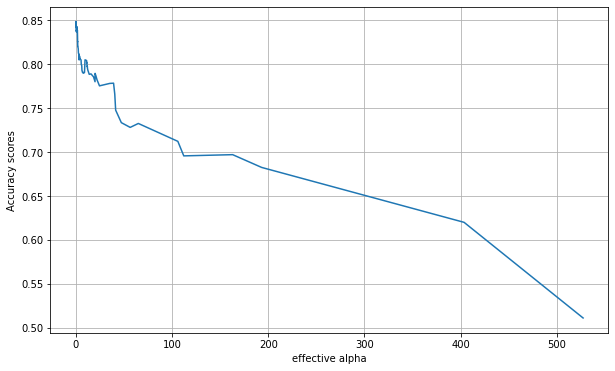

In [ ]:
r2_score = [metrics.r2_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], r2_score[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [ ]:
model3 = tree.DecisionTreeRegressor(random_state=12, ccp_alpha=5)
model3.fit(X_train, y_train)
pickle.dump(model3, open( "./models/CART/CART_3.pkl", "wb"))

In [ ]:
cart_3 = pickle.load(open("./models/CART/CART_3.pkl", "rb"))

In [ ]:
prediction_3 = cart_3.predict(X_test)
print(prediction_3)

[32.70450237 65.45906174 65.45906174 ... 50.72721377 65.45906174
 50.72721377]


In [ ]:
# from sklearn import metrics
# print('MAE:', metrics.mean_absolute_error(y_test, prediction_3))
# print('MSE:', metrics.mean_squared_error(y_test, prediction_3))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_3)))
# print('Acuracy:', metrics.explained_variance_score(y_test, prediction_3))
# print('R2_score', metrics.r2_score(y_test, prediction_3))
mae, mse, rmse, r_squared = evaluation(y_test, prediction_3)
new_row = {"Model": "CART3","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2_score', r_squared)

MAE: 17.362509853810757
MSE: 927.0197744955435
RMSE: 30.44699943336853
R2_score 0.8060818784185069


# Linear regression

In [ ]:
# linear regression 
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

pickle.dump(model_linear, open( "./models/Regression/linear.pkl", "wb"))


In [ ]:
reg_linear = pickle.load(open("./models/Regression/linear.pkl", "rb"))

In [ ]:
y_pred_linear = reg_linear.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_linear)
new_row = {"Model": "Linear","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2_score', r_squared)

MAE: 12.096418574609869
MSE: 429.54245139616654
RMSE: 20.725405940443398
R2_score 0.9101463985926496


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha = 1.0)
model_ridge.fit(X_train, y_train)

pickle.dump(model_ridge, open( "./models/Regression/ridge.pkl", "wb"))


In [ ]:
reg_ridge = pickle.load(open("./models/Regression/ridge.pkl", "rb"))

In [ ]:
y_pred_ridge = reg_ridge.predict(X_test)
mae, mse, rmse, r_squared = evaluation(y_test, y_pred_ridge)
new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2_score', r_squared)

MAE: 12.30698326537633
MSE: 452.7289483151086
RMSE: 21.277428141462693
R2_score 0.9052961439893721


# RESULT

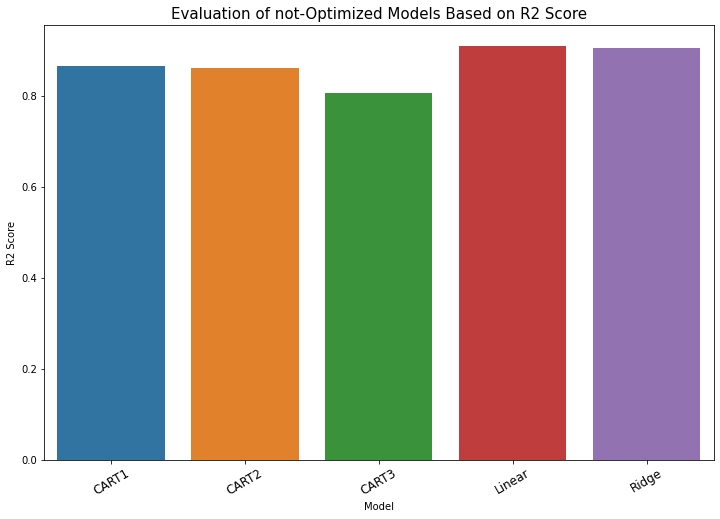

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["R2 Score"])
plt.title("Evaluation of not-Optimized Models Based on R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

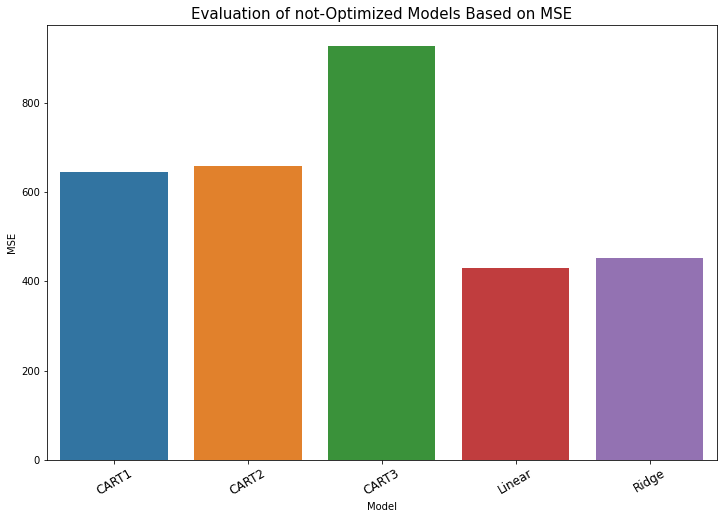

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["MSE"])
plt.title("Evaluation of not-Optimized Models Based on MSE", size=15)
plt.xticks(rotation=30, size=12)
plt.show()